<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Polynomial_Reg_VS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                                                                            
import pandas as pd                                        
import matplotlib.pyplot as plt                             
from sklearn.decomposition import PCA                    
from sklearn.preprocessing import StandardScaler         
from scipy import stats   
import scipy
import seaborn as sns  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics    
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)

pho = df['Phosphate']
pho

for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [5]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [6]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [7]:
data=df
data.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [8]:
corr_matrix = np.corrcoef(data.iloc[:,:15], rowvar = False)
print('Correlation Matrix of the Features')
print(np.around(corr_matrix,2)) 
data.describe()

Correlation Matrix of the Features
[[ 1.    0.21 -0.24  0.18 -0.24 -0.27 -0.1  -0.06 -0.34 -0.23 -0.29 -0.4
  -0.39 -0.04 -0.  ]
 [ 0.21  1.   -0.23 -0.04 -0.23 -0.18 -0.19 -0.07 -0.27 -0.23 -0.18 -0.14
  -0.29  0.06 -0.09]
 [-0.24 -0.23  1.    0.64  0.98  0.83  0.89  0.71  0.75  0.74  0.84  0.54
   0.83  0.08  0.51]
 [ 0.18 -0.04  0.64  1.    0.62  0.38  0.7   0.66  0.29  0.36  0.38  0.1
   0.23 -0.03  0.31]
 [-0.24 -0.23  0.98  0.62  1.    0.82  0.88  0.69  0.75  0.73  0.83  0.54
   0.83  0.09  0.52]
 [-0.27 -0.18  0.83  0.38  0.82  1.    0.63  0.5   0.71  0.63  0.97  0.48
   0.66  0.11  0.44]
 [-0.1  -0.19  0.89  0.7   0.88  0.63  1.    0.59  0.59  0.62  0.63  0.41
   0.73  0.04  0.46]
 [-0.06 -0.07  0.71  0.66  0.69  0.5   0.59  1.    0.46  0.56  0.53  0.28
   0.54  0.01  0.33]
 [-0.34 -0.27  0.75  0.29  0.75  0.71  0.59  0.46  1.    0.63  0.73  0.6
   0.71  0.07  0.38]
 [-0.23 -0.23  0.74  0.36  0.73  0.63  0.62  0.56  0.63  1.    0.65  0.56
   0.71  0.09  0.48]
 [-0.29 -0.18  0.8

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,7.809275,7.441561,115.752156,62.225873,196.536591,8.906119,43.683778,24.361396,3.036222,0.511795,14.175075,1.286371,14.791693,0.089413,0.293491
std,0.411216,1.107170,47.283961,20.068358,81.088229,5.719637,17.846355,10.815360,2.304195,0.494124,9.279435,1.838680,14.644176,0.156410,0.132387
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.560000,6.700000,84.000000,50.000000,140.000000,5.295000,32.000000,16.000000,1.735000,0.249000,8.625625,0.244000,5.472000,0.023370,0.221584
50%,7.860000,7.400000,102.000000,56.000000,171.000000,7.100000,40.000000,22.000000,2.410000,0.312000,11.100000,0.527000,9.450000,0.046253,0.254116
75%,8.100000,8.100000,129.000000,72.000000,219.500000,10.235000,52.000000,28.000000,3.400000,0.468000,16.370625,1.506928,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [9]:
#sns.pairplot(data.iloc[:,:15],vars=['pH',	'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate',	'WPI'],markers='o', kind='reg',diag_kind='kde' )

In [10]:
response_feature = data.iloc[:,14]
cat_response_feature = np.empty((len(response_feature),1))
for i in range(0,len(response_feature)):                    
    if response_feature[i]<0.5:
        cat_response_feature[i] = 1
    elif response_feature[i]>0.5 and response_feature[i]<0.75:
        cat_response_feature[i] = 2
    elif response_feature[i]>0.75 and response_feature[i]<1:
        cat_response_feature[i] = 3
    elif response_feature[i]>1:
        cat_response_feature[i] = 4
pred_data = data.iloc[:,:14]
mean = np.mean(pred_data, axis = 0).values
std = np.std(pred_data, axis = 0).values

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,:15])   
scaled_pred_data = pd.DataFrame(scaled_data[:,:14],columns =['pH',	'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate'])

scaled_response_feature = pd.DataFrame(scaled_data[:,14],columns =['WPI'])
scaled_pred_data.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
count,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,-8.982092e-17,-1.763362e-16,-2.015271e-16,3.305592e-18,-1.577565e-16,2.735662e-17,1.896726e-16,-1.094265e-17,-9.483630e-17,-6.109646e-17,-1.914964e-17,2.553285e-17,9.118875e-19,-1.949160e-17
std,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00
min,-6.595218e+00,-2.930801e+00,-1.264987e+00,-2.704837e+00,-1.216427e+00,-1.175429e+00,-1.665007e+00,-2.069685e+00,-1.101829e+00,-9.173011e-01,-1.119222e+00,-6.981665e-01,-9.569735e-01,-5.722488e-01
25%,-6.068132e-01,-6.704692e-01,-6.722112e-01,-6.098378e-01,-6.979401e-01,-6.320038e-01,-6.553603e-01,-7.738988e-01,-5.652992e-01,-5.323867e-01,-5.986524e-01,-5.674957e-01,-6.370639e-01,-4.226796e-01
50%,1.234800e-01,-3.757628e-02,-2.911409e-01,-3.105523e-01,-3.152474e-01,-3.160998e-01,-2.066285e-01,-2.185618e-01,-2.720541e-01,-4.047571e-01,-3.317268e-01,-4.134227e-01,-3.651408e-01,-2.762305e-01
75%,7.077147e-01,5.953167e-01,2.804644e-01,4.875425e-01,2.834816e-01,2.325755e-01,4.664691e-01,3.367752e-01,1.580388e-01,-8.872210e-02,2.368471e-01,1.200772e-01,2.213601e-01,1.015559e-02
max,1.851841e+00,5.477634e+00,4.069996e+00,5.375873e+00,3.770924e+00,6.903312e+00,5.739067e+00,5.519921e+00,6.509512e+00,5.162322e+00,6.378160e+00,4.589853e+00,6.130801e+00,1.072384e+01


In [12]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(scaled_pred_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print('Variance explained by Principle Component =', np.round(pca.explained_variance_ratio_,3))

Variance explained by Principle Component = [0.541 0.12  0.077 0.059 0.046 0.042]


In [14]:
PCA_data = pca.transform(scaled_pred_data)
print('\nCorrelation Matrix of the Principal Components:')
print(np.round(np.corrcoef(PCA_data, rowvar = False),2))


Correlation Matrix of the Principal Components:
[[ 1. -0. -0. -0. -0. -0.]
 [-0.  1.  0. -0. -0.  0.]
 [-0.  0.  1. -0. -0. -0.]
 [-0. -0. -0.  1. -0.  0.]
 [-0. -0. -0. -0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]]


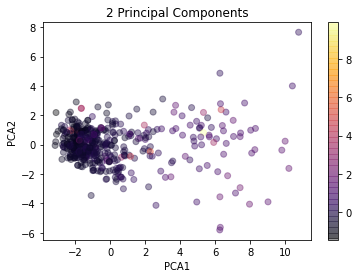

In [15]:
%matplotlib inline
fig2,ax2 = plt.subplots()

graph = ax2.scatter(PCA_data[:,0],PCA_data[:,1], c=scaled_response_feature.iloc[:,0], marker=None, cmap='inferno', alpha=.4)

fig2.colorbar(graph); ax2.set_title('2 Principal Components'); ax2.set_xlabel('PCA1'); ax2.set_ylabel('PCA2')
plt.show()

In [16]:
%matplotlib notebook
fig3 = plt.figure(figsize=(6,6))
ax3 = Axes3D(fig3) 
graph3 = ax3.scatter(PCA_data[:,0],PCA_data[:,1],PCA_data[:,2], c=response_feature, marker=None, cmap='inferno', alpha=.4)
graph.set_clim([0,12000]); fig3.colorbar(graph3); ax3.set_title('3 Principal Components'); ax3.axes.set_xlim3d(left=-5, right=5); ax3.set_xlabel('PCA1'); ax3.axes.set_ylim3d(bottom=-4, top=4); ax3.set_ylabel('PCA2'); ax3.axes.set_zlim3d(bottom=-3, top=3); ax3.set_zlabel('PCA3')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

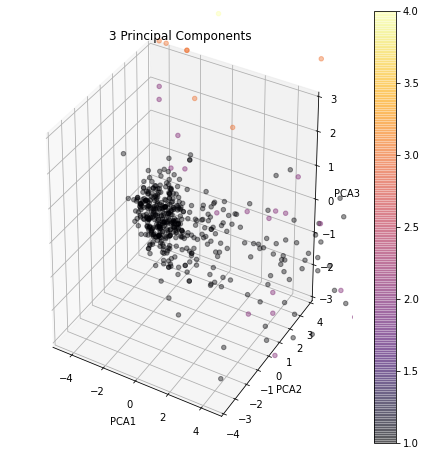

In [17]:
%matplotlib inline
CAT_data = np.concatenate((PCA_data,cat_response_feature), axis = 1)
fig_cat = plt.figure(figsize=(6,6))
ax_cat = Axes3D(fig_cat) 

graph_cat = ax_cat.scatter(CAT_data[:,0],CAT_data[:,1],CAT_data[:,2], c=CAT_data[:,-1], marker=None, cmap='inferno', alpha=.4)

fig_cat.colorbar(graph_cat); ax_cat.set_title('3 Principal Components'); ax_cat.axes.set_xlim3d(left=-5, right=5); ax_cat.set_xlabel('PCA1'); ax_cat.axes.set_ylim3d(bottom=-4, top=4); ax_cat.set_ylabel('PCA2'); ax_cat.axes.set_zlim3d(bottom=-3, top=3); ax_cat.set_zlabel('PCA3')
plt.show()

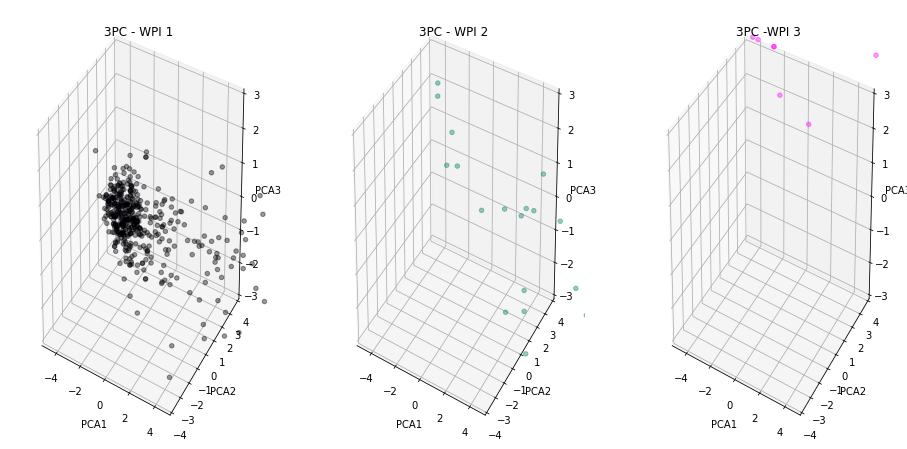

WPI 1: 460
WPI 2: 18
WPI 3: 7


In [18]:
fig_a = plt.figure(figsize=(16,8))
ax_a = fig_a.add_subplot(1,3,1, projection = '3d')

ax_a.scatter(CAT_data[CAT_data[:,-1]==1,0],CAT_data[CAT_data[:,-1]==1,1],CAT_data[CAT_data[:,-1]==1,2], c=CAT_data[CAT_data[:,-1]==1,-1], marker=None, cmap='inferno', alpha=.4)
ax_a.set_title('3PC - WPI 1'); ax_a.axes.set_xlim3d(left=-5, right=5); ax_a.set_xlabel('PCA1'); ax_a.axes.set_ylim3d(bottom=-4, top=4) ; ax_a.set_ylabel('PCA2'); ax_a.axes.set_zlim3d(bottom=-3, top=3) ; ax_a.set_zlabel('PCA3')

ax_b = fig_a.add_subplot(1,3,2, projection = '3d')

ax_b.scatter(CAT_data[CAT_data[:,-1]==2,0],CAT_data[CAT_data[:,-1]==2,1],CAT_data[CAT_data[:,-1]==2,2], c=CAT_data[CAT_data[:,-1]==2,-1], marker=None, cmap='summer', alpha=.4)
ax_b.set_title('3PC - WPI 2'); ax_b.axes.set_xlim3d(left=-5, right=5); ax_b.set_xlabel('PCA1'); ax_b.axes.set_ylim3d(bottom=-4, top=4); ax_b.set_ylabel('PCA2'); ax_b.axes.set_zlim3d(bottom=-3, top=3); ax_b.set_zlabel('PCA3')

ax_c = fig_a.add_subplot(1,3,3, projection = '3d')

ax_c.scatter(CAT_data[CAT_data[:,-1]==3,0],CAT_data[CAT_data[:,-1]==3,1],CAT_data[CAT_data[:,-1]==3,2], c=CAT_data[CAT_data[:,-1]==3,-1], marker=None, cmap='spring', alpha=.4)
ax_c.set_title('3PC -WPI 3'); ax_c.axes.set_xlim3d(left=-5, right=5); ax_c.set_xlabel('PCA1'); ax_c.axes.set_ylim3d(bottom=-4, top=4); ax_c.set_ylabel('PCA2'); ax_c.axes.set_zlim3d(bottom=-3, top=3); ax_c.set_zlabel('PCA3')


plt.show()

print(f'WPI 1: {np.count_nonzero(CAT_data[:,-1]==1)}')
print(f'WPI 2: {np.count_nonzero(CAT_data[:,-1]==2)}')
print(f'WPI 3: {np.count_nonzero(CAT_data[:,-1]==3)}')



In [19]:
num_features = 3
X_train, X_test, y_train, y_test = train_test_split(PCA_data[:,:num_features], np.array(scaled_response_feature), test_size=0.15, random_state=117)

The optimal hermite order is: 1
The optimal polynomial order is: 3
The optimal mean squared error is 0.0017428781390712684


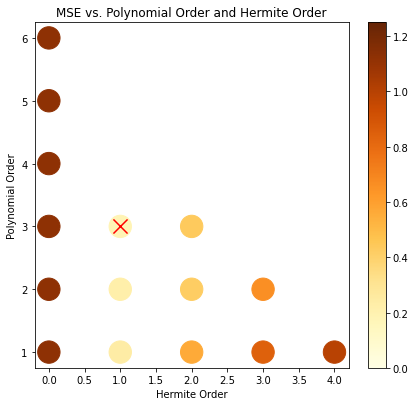

In [20]:
orders = [0,1,2,3,4] 
poly_order =[1,2,3,4,5,6]
hermite_error = np.zeros([len(orders),len(poly_order)])
hermite_r2 = np.zeros([len(orders),len(poly_order)])
for i in orders:
    hermite_train = scipy.special.eval_hermitenorm(i, X_train, out=None) 
    hermite_test= scipy.special.eval_hermitenorm(i, X_test, out=None) 

    for j in poly_order:
        hermite = Pipeline([('poly', PolynomialFeatures(degree=j)),('linear', LinearRegression())])
        hermite.fit(hermite_train, y_train) 
        hermite_pred = hermite.predict(scipy.special.eval_hermitenorm(i, X_test, out=None))
        #mse error
        if mean_squared_error(y_test,hermite_pred) < 3:
            hermite_error[orders.index(i),poly_order.index(j)] = mean_squared_error(y_test,hermite_pred)
        #variance
        hermite_r2[orders.index(i),poly_order.index(j)] = r2_score(y_test,hermite_pred)


fig8, ax8 = plt.subplots()
hermite_error[hermite_error == 0] = np.amax(hermite_error)
row, col = np.unravel_index(hermite_error.argmin(), hermite_error.shape)
poly_orderp, ordersp = np.meshgrid(poly_order,orders)
plot_data = np.dstack((ordersp,poly_orderp,hermite_error))
print(f'The optimal hermite order is: {row}')
print(f'The optimal polynomial order is: {col+1}')

cutoff = 1.2
plt.subplot(121)
hermite_plot = plt.scatter(plot_data[:,:,0][plot_data[:,:,2]<cutoff],plot_data[:,:,1][plot_data[:,:,2]<cutoff], c = plot_data[:,:,2][plot_data[:,:,2]<cutoff], s = 500, cmap = 'YlOrBr')
cbar_herm = plt.colorbar(hermite_plot, orientation = 'vertical');
plt.clim([0,1.25])
plt.scatter(row,col+1,color = 'r', marker = 'x', s = 200)
plt.title('MSE vs. Polynomial Order and Hermite Order'); plt.xlabel('Hermite Order'); plt.ylabel('Polynomial Order')

#Evaluate at optimal order
optherm_train = scipy.special.eval_hermitenorm(row, PCA_data, out=None) 
optherm_test= scipy.special.eval_hermitenorm(row, PCA_data, out=None) 
optherm = Pipeline([('poly', PolynomialFeatures(degree=col+1)),('linear', LinearRegression())])
optherm.fit(optherm_train, scaled_response_feature[:])     
hermite_pred = optherm.predict(scipy.special.eval_hermitenorm(row, PCA_data, out=None))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
print(f'The optimal mean squared error is {mean_squared_error(scaled_response_feature[:],hermite_pred)}')

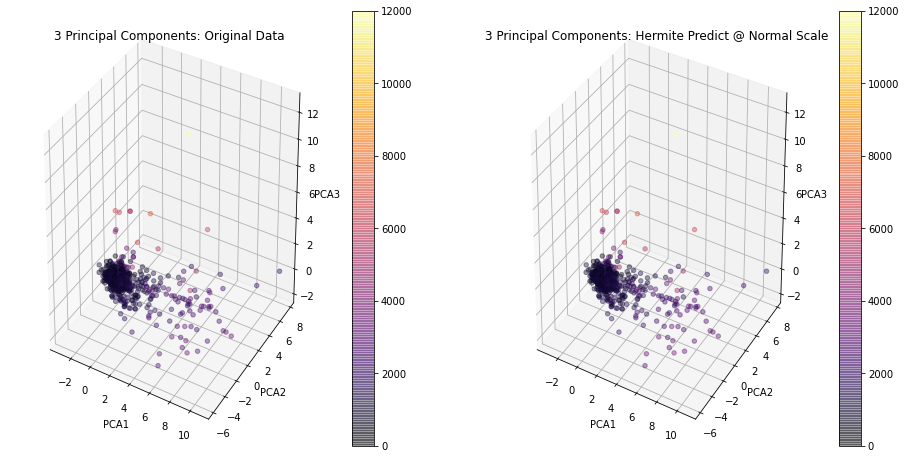

In [21]:
fig9 = plt.figure(figsize=(16,8))

ax9 = fig9.add_subplot(1,2,1, projection = '3d')
orig_model = ax9.scatter(PCA_data[:,0],PCA_data[:,1],PCA_data[:,2], c=response_feature, marker=None, cmap='inferno', alpha=.4)
orig_model.set_clim([0,12000]); fig9.colorbar(orig_model); ax9.set_title('3 Principal Components: Original Data'); ax9.set_xlabel('PCA1'); ax9.set_ylabel('PCA2'); ax9.set_zlabel('PCA3')

fitted_data = np.column_stack((scaled_pred_data,hermite_pred.reshape(487,1)))
predict_prod = scaler.inverse_transform(fitted_data)

ax10 = fig9.add_subplot(1,2,2, projection = '3d')
reg_model = ax10.scatter(PCA_data[:,0],PCA_data[:,1],PCA_data[:,2], c=predict_prod[:,-1], marker=None, cmap='inferno', alpha=.4)
reg_model.set_clim([0,12000]); fig9.colorbar(reg_model); ax10.set_title('3 Principal Components: Hermite Predict @ Normal Scale'); ax10.set_xlabel('PCA1'); ax10.set_ylabel('PCA2'); ax10.set_zlabel('PCA3')
plt.show()

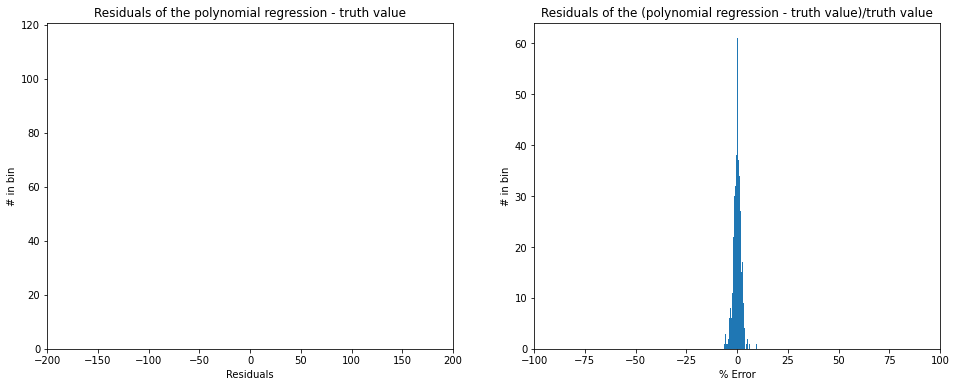

The number of predictions within +/- 100 is : 487
The number of predictions within +/- 10% Error is : 486
The number of predictions within +/- 20% Error is : 487


In [22]:
residuals = predict_prod[:,-1]-response_feature
residuals_percent = residuals/response_feature*100
fig11, ax11 = plt.subplots(figsize = (16,6))

plt.subplot(121)
plt.hist(residuals, bins = 30)
plt.title('Residuals of the polynomial regression - truth value'); plt.xlabel('Residuals'); plt.ylabel('# in bin'),plt.xlim([-200,200])

plt.subplot(122)
plt.hist(residuals_percent[abs(residuals_percent)<101], bins = 75)
plt.title('Residuals of the (polynomial regression - truth value)/truth value'); plt.xlabel('% Error'); plt.xlim([-100,100]); plt.ylabel('# in bin')
plt.show()

print(f'The number of predictions within +/- 100 is : {np.count_nonzero(abs(predict_prod[:,-1]-response_feature)<100)}')
print(f'The number of predictions within +/- 10% Error is : {np.count_nonzero(abs(residuals_percent)<10)}')
print(f'The number of predictions within +/- 20% Error is : {np.count_nonzero(abs(residuals_percent)<20)}')

In [23]:
Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(CAT_data[:,:num_features], np.array(CAT_data[:,-1]), test_size=0.15, random_state=117)
C = np.linspace(11,40,30)
degree = np.linspace(1,5,5)
f_score = np.zeros([len(degree),len(C)])
for i in range(0,len(degree)):
    for j in range(0,len(C)):
        SVM_Model = SVC(kernel = 'poly', degree = degree[i], random_state = 117, C = C[j])
        SVM_Model.fit(Xcat_train, ycat_train)
        ysvm_predict = SVM_Model.predict(Xcat_test)
        f_score[i,j] = f1_score(ycat_test, ysvm_predict, average='macro')

The optimal degree is 5.0 and the optimal C value is 11.0.
The maximum f1 score is 0.5112709832134292


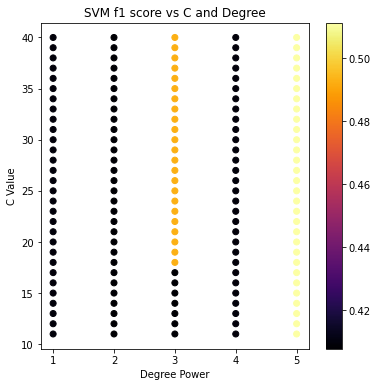

In [24]:
index_degree, index_C = np.unravel_index(f_score.argmax(),f_score.shape)
report_degree  = degree[index_degree]
report_C  = C[index_C]
print(f'The optimal degree is {report_degree} and the optimal C value is {report_C}.')
print(f'The maximum f1 score is {f_score[index_degree,index_C]}')

Cp, degreep = np.meshgrid(C,degree);
fig_svm,ax_svm = plt.subplots(figsize = (6,6))
svm_plot = plt.scatter(degreep,Cp,c=f_score, cmap = 'inferno')
cbar = plt.colorbar(svm_plot, orientation = 'vertical'); plt.title('SVM f1 score vs C and Degree'); plt.xlabel('Degree Power'); plt.ylabel('C Value'); plt.xticks(np.arange(1,6,step = 1))
plt.show()

In [25]:
SVM_Model = SVC(kernel = 'poly', degree = degree[index_degree], random_state = 117, C = C[index_C])
SVM_Model.fit(CAT_data[:,:num_features], CAT_data[:,-1])
final_predict = SVM_Model.predict(CAT_data[:,:num_features])
confusion_matrix(CAT_data[:,-1],final_predict)

array([[460,   0,   0,   0],
       [ 11,   7,   0,   0],
       [  0,   0,   7,   0],
       [  0,   0,   0,   2]])

In [26]:
print(classification_report(CAT_data[:,-1], final_predict, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       460
           2       1.00      0.39      0.56        18
           3       1.00      1.00      1.00         7

   micro avg       0.98      0.98      0.98       485
   macro avg       0.99      0.80      0.85       485
weighted avg       0.98      0.98      0.97       485



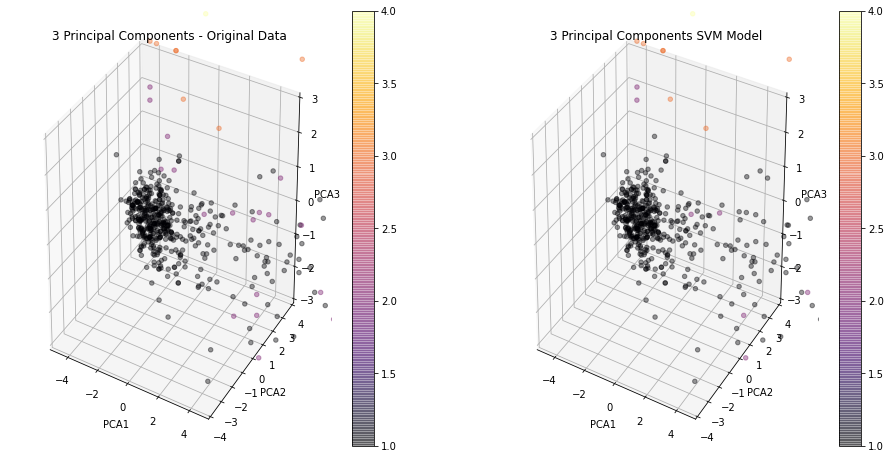

In [27]:
fig_svm = plt.figure(figsize=(16,8))

ax_cat = fig_svm.add_subplot(1,2,1, projection = '3d')
graph_cat = ax_cat.scatter(CAT_data[:,0],CAT_data[:,1],CAT_data[:,2], c=CAT_data[:,-1], marker=None, cmap='inferno', alpha=.4)
fig_svm.colorbar(graph_cat); ax_cat.set_title('3 Principal Components - Original Data'); ax_cat.axes.set_xlim3d(left=-5, right=5); ax_cat.set_xlabel('PCA1'); ax_cat.axes.set_ylim3d(bottom=-4, top=4); ax_cat.set_ylabel('PCA2'); ax_cat.axes.set_zlim3d(bottom=-3, top=3); ax_cat.set_zlabel('PCA3')

ax_svm = fig_svm.add_subplot(1,2,2, projection = '3d')
graph_svm = ax_svm.scatter(CAT_data[:,0],CAT_data[:,1],CAT_data[:,2], c=final_predict, marker=None, cmap='inferno', alpha=.4)
fig_svm.colorbar(graph_svm); ax_svm.set_title('3 Principal Components SVM Model'); ax_svm.axes.set_xlim3d(left=-5, right=5); ax_svm.set_xlabel('PCA1'); ax_svm.axes.set_ylim3d(bottom=-4, top=4); ax_svm.set_ylabel('PCA2'); ax_svm.axes.set_zlim3d(bottom=-3, top=3); ax_svm.set_zlabel('PCA3')

plt.show()

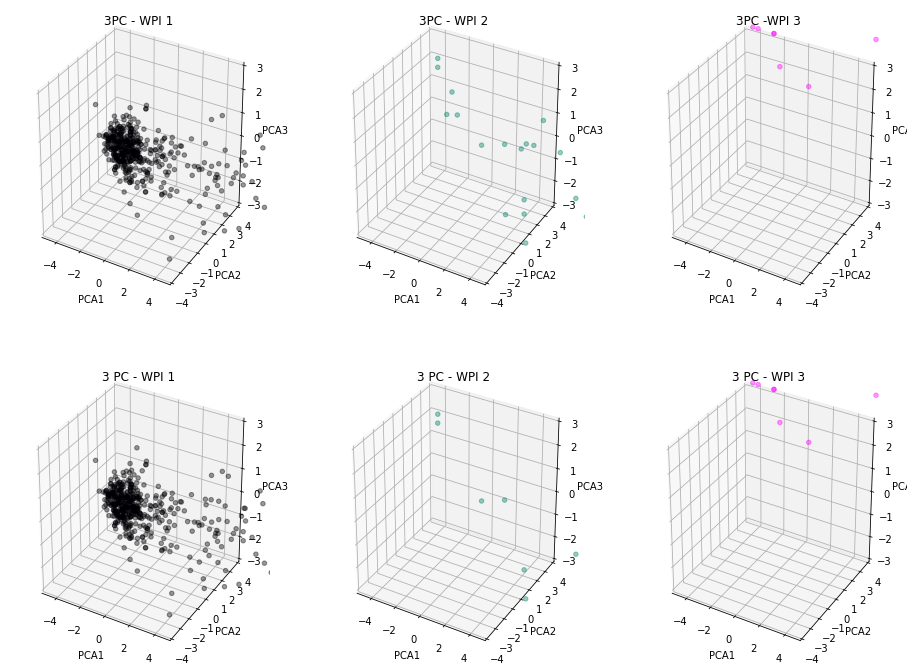

In [28]:
CAT_datap = np.copy(CAT_data)
CAT_datap[:,-1] = final_predict
fig_aa = plt.figure(figsize=(16,12))

ax_a = fig_aa.add_subplot(2,3,1, projection = '3d')

ax_a.scatter(CAT_data[CAT_data[:,-1]==1,0],CAT_data[CAT_data[:,-1]==1,1],CAT_data[CAT_data[:,-1]==1,2], c=CAT_data[CAT_data[:,-1]==1,-1], marker=None, cmap='inferno', alpha=.4)
ax_a.set_title('3PC - WPI 1'); ax_a.axes.set_xlim3d(left=-5, right=5); ax_a.set_xlabel('PCA1'); ax_a.axes.set_ylim3d(bottom=-4, top=4) ; ax_a.set_ylabel('PCA2'); ax_a.axes.set_zlim3d(bottom=-3, top=3) ; ax_a.set_zlabel('PCA3')

ax_b = fig_aa.add_subplot(2,3,2, projection = '3d')

ax_b.scatter(CAT_data[CAT_data[:,-1]==2,0],CAT_data[CAT_data[:,-1]==2,1],CAT_data[CAT_data[:,-1]==2,2], c=CAT_data[CAT_data[:,-1]==2,-1], marker=None, cmap='summer', alpha=.4)
ax_b.set_title('3PC - WPI 2'); ax_b.axes.set_xlim3d(left=-5, right=5); ax_b.set_xlabel('PCA1'); ax_b.axes.set_ylim3d(bottom=-4, top=4); ax_b.set_ylabel('PCA2'); ax_b.axes.set_zlim3d(bottom=-3, top=3); ax_b.set_zlabel('PCA3')

ax_c = fig_aa.add_subplot(2,3,3, projection = '3d')

ax_c.scatter(CAT_data[CAT_data[:,-1]==3,0],CAT_data[CAT_data[:,-1]==3,1],CAT_data[CAT_data[:,-1]==3,2], c=CAT_data[CAT_data[:,-1]==3,-1], marker=None, cmap='spring', alpha=.4)
ax_c.set_title('3PC -WPI 3'); ax_c.axes.set_xlim3d(left=-5, right=5); ax_c.set_xlabel('PCA1'); ax_c.axes.set_ylim3d(bottom=-4, top=4); ax_c.set_ylabel('PCA2'); ax_c.axes.set_zlim3d(bottom=-3, top=3); ax_c.set_zlabel('PCA3')

ax_aa = fig_aa.add_subplot(2,3,4, projection = '3d')
graph_aa = ax_aa.scatter(CAT_datap[CAT_datap[:,-1]==1,0],CAT_datap[CAT_datap[:,-1]==1,1],CAT_datap[CAT_datap[:,-1]==1,2], c=final_predict[final_predict[:]==1], marker=None, cmap='inferno', alpha=.4)
ax_aa.set_title('3 PC - WPI 1'); ax_aa.axes.set_xlim3d(left=-5, right=5); ax_aa.set_xlabel('PCA1'); ax_aa.axes.set_ylim3d(bottom=-4, top=4); ax_aa.set_ylabel('PCA2'); ax_aa.axes.set_zlim3d(bottom=-3, top=3); ax_aa.set_zlabel('PCA3')

ax_bb = fig_aa.add_subplot(2,3,5, projection = '3d')
graph_bb = ax_bb.scatter(CAT_datap[CAT_datap[:,-1]==2,0],CAT_datap[CAT_datap[:,-1]==2,1],CAT_datap[CAT_datap[:,-1]==2,2], c=final_predict[final_predict[:]==2], marker=None, cmap='summer', alpha=.4)
ax_bb.set_title('3 PC - WPI 2'); ax_bb.axes.set_xlim3d(left=-5, right=5); ax_bb.set_xlabel('PCA1'); ax_bb.axes.set_ylim3d(bottom=-4, top=4); ax_bb.set_ylabel('PCA2'); ax_bb.axes.set_zlim3d(bottom=-3, top=3); ax_bb.set_zlabel('PCA3')

ax_cc = fig_aa.add_subplot(2,3,6, projection = '3d')
graph_cc = ax_cc.scatter(CAT_datap[CAT_datap[:,-1]==3,0],CAT_datap[CAT_datap[:,-1]==3,1],CAT_datap[CAT_datap[:,-1]==3,2], c=final_predict[final_predict[:]==3], marker=None, cmap='spring', alpha=.4)
ax_cc.set_title('3 PC - WPI 3'); ax_cc.axes.set_xlim3d(left=-5, right=5); ax_cc.set_xlabel('PCA1'); ax_cc.axes.set_ylim3d(bottom=-4, top=4); ax_cc.set_ylabel('PCA2'); ax_cc.axes.set_zlim3d(bottom=-3, top=3); ax_cc.set_zlabel('PCA3')

plt.show()

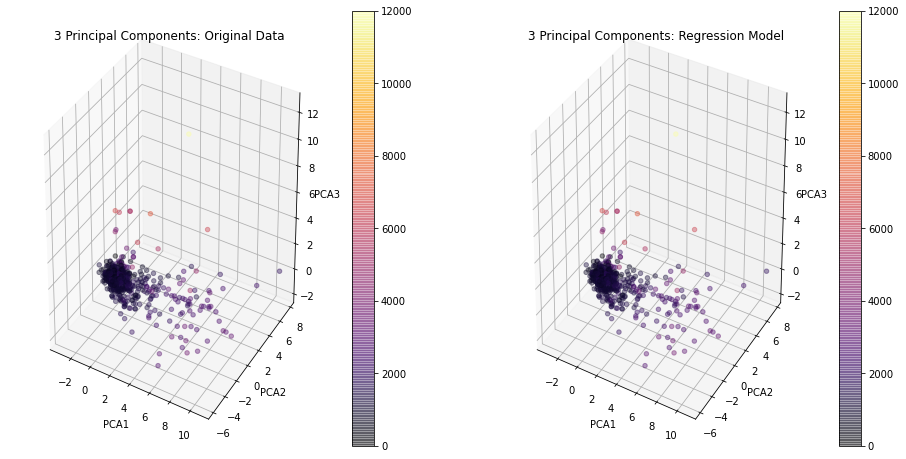

In [29]:
fig_final = plt.figure(figsize=(16,8))

ax_real = fig_final.add_subplot(1,2,1, projection = '3d')
final_real = ax_real.scatter(PCA_data[:,0],PCA_data[:,1],PCA_data[:,2], c=response_feature, marker=None, cmap='inferno', alpha=.4)
final_real.set_clim([0,12000]); fig_final.colorbar(final_real, ax = ax_real)
ax_real.set_title('3 Principal Components: Original Data'); ax_real.set_xlabel('PCA1'); ax_real.set_ylabel('PCA2'); ax_real.set_zlabel('PCA3')

ax_predict = fig_final.add_subplot(1,2,2, projection = '3d')
final_pred = ax_predict.scatter(PCA_data[:,0],PCA_data[:,1],PCA_data[:,2], c=predict_prod[:,-1], marker=None, cmap='inferno', alpha=.4)
final_pred.set_clim([0,12000]); fig_final.colorbar(final_pred,ax = ax_predict)
ax_predict.set_title('3 Principal Components: Regression Model'); ax_predict.set_xlabel('PCA1'); ax_predict.set_ylabel('PCA2'); ax_predict.set_zlabel('PCA3')

plt.show()